# Neural networks
### Multi-layer perceptron

CSI4106 Artificial Intelligence  
Fall 2018  
Caroline Barrière

***

We are going into the medical domain for this notebook. The supervised classification task tackled in this notebook is about diabetes patient readmission in hospital, provided a certain set of features describing their physical state, as well as the procedure they went through during their stay, the medications they take, etc.

Any *readmitted patient* is very costly for a medical system. It shows to some extent, that the patient was discharged before having fully recovered.  The dataset we explore splits readmission into 3 values: before 30 days, after 30 days, and none.  Understanding what conditions brings patients back to the hospital within 30 days is very important for a medical system, as these cases should be minimized.

This notebook will allow you to pursue your understanding of experimental set-up for supervised machine learning, in particular supervised classification through the use of multi-layer perceptrons.

We will make use of two packages: (1) **scikit-learn**, a great machine learning package, which you've experimented with in the last notebook, and (2) **pandas**, a must-have for data science.  Make sure you have the LATEST version of scikit-learn (version 0.20), otherwise some functions (the one-hot-encoder) will not work.

As this is your 5th notebook this semester, some instructions will be a bit less explicit.

***

***HOMEWORK***:  
Go through the notebook by running each cell, one at a time. Look for (**TO DO**) for the tasks that you need to perform.  
Make sure you *sign* (type your name) the notebook at the end. Once you're done, submit your notebook.

***

**1. Obtaining the dataset**

First, read the description of the dataset on Diabetes Readmission (https://www.kaggle.com/brandao/diabetes/home).  The content of this site is also copied in the file Diabetes-DatasetDescription.ipynb, so you can have it locally.  

Download the dataset (file dataset_diabetes.zip) from the UCI archive:
https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008

Unzip the file *dataset_diabetes.zip* and there should be a file called *diabetic_data.csv* which we will use for our experiments.


**2. Exploring the dataset**  
We will use the package *pandas* to read the csv file.  It will create a data structure called a dataframe, which will contain all the data. 

If you get some errors when you import the packages, it's because they are not installed... make sure you do *pip install package_name* at the command prompt to have access to these packages.

In [1]:
# import the required packages for data analysis and machine learning

import pandas as pd
import sklearn

The following code reads the csv file (which I've put under a repertory called *Diabetes*, but you should adjust the path to where you've put it).  And then, it shows the top rows.

In [2]:
# Read the dataset, show top rows

X = pd.read_csv("Diabetes/diabetic_data.csv")
X.head(20)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [51]:
# Show all attributes
list(X)

['encounter_id',
 'patient_nbr',
 'race',
 'gender',
 'age',
 'weight',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'payer_code',
 'medical_specialty',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'diag_1',
 'diag_2',
 'diag_3',
 'number_diagnoses',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'examide',
 'citoglipton',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed',
 'readmitted']

In [52]:
# Examples of data exploration

print(X.shape)
print(X['race'].value_counts())

(101766, 50)
Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64


**(TO-DO - Q1)** Inspired by the little piece of code above, write code to answer the following questions.  You can do part of the process manually (the code needs to help you answer).

1. How many examples are in the dataset ? 101766
2. How many features are in the dataset ? 50
3. What are the possible age ranges, and the number of examples in each ?
4. What are the prior probabilities of each class (>30, NO, <30) ?
5. Are there some patient present in the dataset more than 20 times?

In [55]:
### YOUR CODE -- Write which question it answers
# 1. How many examples are in the dataset ? 
print("there are {} examples in the data set".format(X.shape[0]))
#101766

# 2. How many features are in the dataset ?
print("there are {} features in the data set".format(X.shape[1]))
#50

# 3. What are the possible age ranges, and the number of examples in each ?
print(X['age'].value_counts())
# [70-80)     26068
# [60-70)     22483
# [50-60)     17256
# [80-90)     17197
# [40-50)      9685
# [30-40)      3775
# [90-100)     2793
# [20-30)      1657
# [10-20)       691
# [0-10)        161


# 4. What are the prior probabilities of each class (>30, NO, <30) ?
XList = X['readmitted'].tolist()
total = len(XList)
less = 0
no = 0
more = 0
for X in XList:
    if X == ">30":
        more +=1
    elif X == "<30": 
        less +=1
    elif X == "NO":
        no += 1
print("the prior probability of >30 is {0}, <30 {1}, and NO is {2}".format(more/total, less/total, no/total))


X = pd.read_csv("Diabetes/diabetic_data.csv")

there are 101766 examples in the data set
there are 50 features in the data set
[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64
the prior probability of >30 is 0.3492816854352141, <30 0.11159915885462728, and NO is 0.5391191557101586


In [64]:
# 5. Are there some patient present in the dataset more than 20 times?
print(X['patient_nbr'].value_counts()>20)
# yes there are 

88785891      True
43140906      True
23199021      True
1660293       True
88227540      True
23643405      True
84428613      True
92709351      True
23398488     False
90609804     False
88789707     False
37096866     False
89472402     False
29903877     False
88681950     False
88479036     False
97391007     False
24011577     False
3481272      False
91160280     False
84348792     False
3401055      False
91751121     False
106757478    False
90489195     False
41699412     False
84676248     False
384939       False
90164655     False
41617368     False
             ...  
141459593    False
54207855     False
71579169     False
23406147     False
6348348      False
137952824    False
23234103     False
78943797     False
43683723     False
85241394     False
18267696     False
45161577     False
32417442     False
61105707     False
106231896    False
3397149      False
39734766     False
23850522     False
42977016     False
113160366    False
8105490      False
16600590    

**3.  Preparing the dataset for experimentation**

We will do different steps to prepare the data for experimentations:  (1) extracting the class we wish to predict, (2) splitting the dataset into a training and a test set

In [3]:
# This can ONLY BE DONE ONCE, as we pop the values into a new variable to be used as predicted class
y = X.pop("readmitted").values

In [4]:
# split the large dataset into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
print(X_train.shape)
print(y_test.shape)

(76324, 49)
(25442,)


**4. Input encoding**

We saw in class that any multi-value feature must be encoded into a one-hot vector.  The code below allows this encoding.

In [5]:
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

# encoder
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

# since the dataset is quite large, try a subset of features
featureSet = ['race','gender','age', 'weight', 'time_in_hospital', 'num_lab_procedures', 'num_procedures',
 'num_medications']

# make a copy of the training set containing only the chosen features
X_train_sf = X_train[featureSet].copy()
X_test_sf = X_test[featureSet].copy()

# IF you wanted to try with the full dataset, try to redo the steps with this (optional - takes a lot of time)
# X_train_allf = X_train[:].copy()
# X_test_allf = X_test[:].copy()

# perform the one-hot encoder on the 3 features selected
ohe.fit(X_train_sf)


OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'numpy.float64'>, handle_unknown='ignore',
       n_values=None, sparse=False)

In [6]:
# The one-hot-encoder renames the features

feature_names = ohe.get_feature_names()
print(feature_names)

['x0_?' 'x0_AfricanAmerican' 'x0_Asian' 'x0_Caucasian' 'x0_Hispanic'
 'x0_Other' 'x1_Female' 'x1_Male' 'x1_Unknown/Invalid' 'x2_[0-10)'
 'x2_[10-20)' 'x2_[20-30)' 'x2_[30-40)' 'x2_[40-50)' 'x2_[50-60)'
 'x2_[60-70)' 'x2_[70-80)' 'x2_[80-90)' 'x2_[90-100)' 'x3_>200' 'x3_?'
 'x3_[0-25)' 'x3_[100-125)' 'x3_[125-150)' 'x3_[150-175)' 'x3_[175-200)'
 'x3_[25-50)' 'x3_[50-75)' 'x3_[75-100)' 'x4_1' 'x4_2' 'x4_3' 'x4_4'
 'x4_5' 'x4_6' 'x4_7' 'x4_8' 'x4_9' 'x4_10' 'x4_11' 'x4_12' 'x4_13'
 'x4_14' 'x5_1' 'x5_2' 'x5_3' 'x5_4' 'x5_5' 'x5_6' 'x5_7' 'x5_8' 'x5_9'
 'x5_10' 'x5_11' 'x5_12' 'x5_13' 'x5_14' 'x5_15' 'x5_16' 'x5_17' 'x5_18'
 'x5_19' 'x5_20' 'x5_21' 'x5_22' 'x5_23' 'x5_24' 'x5_25' 'x5_26' 'x5_27'
 'x5_28' 'x5_29' 'x5_30' 'x5_31' 'x5_32' 'x5_33' 'x5_34' 'x5_35' 'x5_36'
 'x5_37' 'x5_38' 'x5_39' 'x5_40' 'x5_41' 'x5_42' 'x5_43' 'x5_44' 'x5_45'
 'x5_46' 'x5_47' 'x5_48' 'x5_49' 'x5_50' 'x5_51' 'x5_52' 'x5_53' 'x5_54'
 'x5_55' 'x5_56' 'x5_57' 'x5_58' 'x5_59' 'x5_60' 'x5_61' 'x5_62' 'x5_63'
 'x5_64

In [7]:
# We can now encode the training and test set with the new features

X_train_sf_encoded = ohe.transform(X_train_sf)
X_test_sf_encoded = ohe.transform(X_test_sf)

**(TO-DO - Q2)** - How many features are there now, after the one-hot-encoder? Why so many? Show the shape of the training set now.

In [8]:
# We can see the shape of the training data
X_train_sf_encoded.shape

(76324, 240)

There are 240 features now. We have a lot more features due to what one-hot-encoder is doing. All distinct values from previous features are now made into their own features. So if we had a feature that had Caucasian, AfricanAmerican, Hispanic, Other, Asian that all wouldve been in one feauture. But now they each become their own fetures getting assigned a value (0, or 1) if it is true or not. 

**5. Train the Multi-layer Perceptron**

In [9]:
# Import the MLP model
from sklearn.neural_network import MLPClassifier
import datetime
import matplotlib.pyplot as plt

In [10]:
# Define the model
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(100, 2), random_state=1, max_iter=100, learning_rate_init=.01, warm_start=True)

**(TO-DO - Q3)** - Explain the parameters chosen above, and explain what the "score" is (used below).  You will need to look into the documentation for MLPclassifier to understand the score.

<li> ‘lbfgs’ is an optimizer in the family of quasi-Newton methods. It is the solver for weight optimization.
<li> Alpha is the L2 penalty (regularization term) parameter. We have chosen an extremely small regularization. 
<li> Hidden layer size is the number of neurons in the hidden layers. We have it set to (100,100) which is 2 layers of 100 nodes. In our exmaple we have 2 hidden layer one with 100 nodes, and one with 2
<li> Random_state is the seed used by the random number generator. We have chosen 1. it is used in many randomized algorithms in sklearn to determine the random seed passed to the pseudo-random number generator.
<li> Maximum number of iterations. The solver iterates until convergence (determined by ‘tol’) or this number of iterations. We have it to 100 so if we do not converge by 100 we will halt. 
<li> The initial learning rate used. It controls the step-size in updating the weights The step size is small but not as small as the default. Smaller steps can take longer but more accurate whereas bigger steps can miss valuable point and jump around too much if it misses the minimum and goes higher and lower. 
<li> When set to True, reuse the solution of the previous call to fit as initialization
<li> Score returns the mean accuracy on the given test data and labels.

In [11]:
# This steps trains the model
# ATTENTION - THIS CAN TAKE LONG IF YOU CHOSE MANY ITERATIONS AND/OR LARGE HIDDEN LAYERS
# Each iteration, on my machine, takes about 80 seconds.  Be patient.
scores_train = []
for i in range(1,10):
    print("Iteration: " + str(i) + "-- " + str(datetime.datetime.now()))
    clf.fit(X_train_sf_encoded, y_train)
    score = clf.score(X_train_sf_encoded, y_train)
    scores_train.append(score)


Iteration: 1-- 2018-11-21 01:52:44.512580
Iteration: 2-- 2018-11-21 01:53:24.209655
Iteration: 3-- 2018-11-21 01:54:04.554801
Iteration: 4-- 2018-11-21 01:54:42.903640
Iteration: 5-- 2018-11-21 01:55:21.463417
Iteration: 6-- 2018-11-21 01:56:00.319200
Iteration: 7-- 2018-11-21 01:56:38.689804
Iteration: 8-- 2018-11-21 01:57:19.087943
Iteration: 9-- 2018-11-21 01:57:57.561378


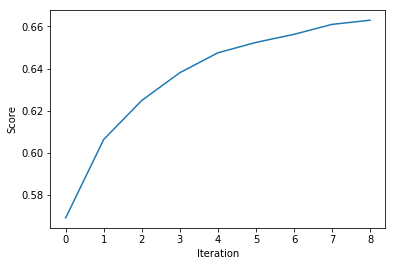

In [12]:
# plot the scores
plt.plot([i for i in range(len(scores_train))], scores_train)
plt.ylabel('Score')
plt.xlabel('Iteration')
plt.show()

**(TO-DO : Q4)** Describe what the code below shows.

In [13]:
# Show the prediction on the first 10 examples
y_predicted = clf.predict(X_train_sf_encoded[0:10])
print(y_predicted)
print(y_train[0:10])
clf.predict_proba(X_train_sf_encoded[0:10])

['NO' '>30' '>30' '>30' 'NO' 'NO' '>30' 'NO' 'NO' 'NO']
['>30' '>30' '>30' 'NO' 'NO' '>30' '>30' 'NO' 'NO' 'NO']


array([[0.12269061, 0.36910215, 0.50820724],
       [0.16332462, 0.51682005, 0.31985533],
       [0.16561638, 0.52584121, 0.30854241],
       [0.16561638, 0.52584121, 0.30854241],
       [0.003544  , 0.00802534, 0.98843066],
       [0.03374723, 0.08969583, 0.87655695],
       [0.16561638, 0.52584121, 0.30854241],
       [0.0146238 , 0.03653977, 0.94883644],
       [0.05662282, 0.15699027, 0.78638691],
       [0.09578205, 0.27945548, 0.62476247]])

Here we have 10 instances we want to predict. Wether it is <30, >30 or NO. Our output array has 10 rows for each of the 10 examples and 3 columns which shows the confidence of the algorithm that that instance belongs to each class. For example we look at row 1. The first is input '>30', it is the ground truth for that example. The algorithm is .12 sure that it is <30, .36 sure that it is >30 and .50 sure that it is NO so it returns the highest one which is NO in this example. This example the algorithm got it wrong. Row 2 correctly has it right at .51 sure that it is >30. 

**5. Test the Multi-layer Perceptron**

**(TO-DO - Q5)** Now that we've trained the model, evaluate on the test set.  What is the score?  How is it compared to the score on the training set?

In [23]:
# The test set is encoded in here: X_test_sf_encoded
scores_test = 0
clf.fit(X_test_sf_encoded, y_test)
score_test = clf.score(X_test_sf_encoded, y_test)

print(score_test)

0.538872730131279


The score is 0.538872730131279 which is a little worse than the score of the traning ~0.66

**6. Varying hyperparameters**

There are many hyperparameters that can be varied (number of hidden layers, learning rate, etc).  It takes time to do these variations... we'll perform just two variations.

**(TO-DO - Q6)** - Redo the experiment above (train + test), changing the number and size of hidden layers to have three layers of 30 units each.  DO NOT CHANGE the code above directly, copy the part of the code needed below, using other variable names (this will allow to run the full notebook in a linear manner).  Compare the results with the first experiment, is it better? worst? Then keep the best model, and change the activation function to the sigmoid.  Better or worst?

In [17]:
# Define the model
clf2 = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(30, 30, 30), random_state=1, max_iter=100, learning_rate_init=.01, warm_start=True)



In [25]:
scores_train2 = []
for i in range(1,10):
    print("Iteration: " + str(i) + "-- " + str(datetime.datetime.now()))
    clf2.fit(X_train_sf_encoded, y_train)
    score2 = clf2.score(X_train_sf_encoded, y_train)
    scores_train2.append(score2)
# print(scores_train)

Iteration: 1-- 2018-11-21 02:33:16.655331
Iteration: 2-- 2018-11-21 02:33:48.016588
Iteration: 3-- 2018-11-21 02:34:18.863747
Iteration: 4-- 2018-11-21 02:34:50.447687
Iteration: 5-- 2018-11-21 02:35:20.896949
Iteration: 6-- 2018-11-21 02:35:51.409063
Iteration: 7-- 2018-11-21 02:36:22.843387
Iteration: 8-- 2018-11-21 02:36:56.251301
Iteration: 9-- 2018-11-21 02:37:28.786817


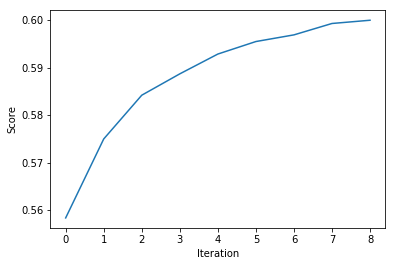

In [26]:
# plot the scores
plt.plot([i for i in range(len(scores_train2))], scores_train2)
plt.ylabel('Score')
plt.xlabel('Iteration')
plt.show()

The results of this model is worse (~.60) than the previous model (~.66). I then changed the activation funtion to the first model since the second one took very long to run. 

In [28]:
# Define the model
clf3 = MLPClassifier(activation='logistic', solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(100,2), random_state=1, max_iter=100, learning_rate_init=.01, warm_start=True)

In [29]:
scores_train3 = []
for i in range(1,10):
    print("Iteration: " + str(i) + "-- " + str(datetime.datetime.now()))
    clf3.fit(X_train_sf_encoded, y_train)
    score3 = clf3.score(X_train_sf_encoded, y_train)
    scores_train3.append(score3)
# print(scores_train)

Iteration: 1-- 2018-11-21 02:40:01.758119
Iteration: 2-- 2018-11-21 02:40:45.584806
Iteration: 3-- 2018-11-21 02:41:28.475405
Iteration: 4-- 2018-11-21 02:42:11.485528
Iteration: 5-- 2018-11-21 02:42:56.174932
Iteration: 6-- 2018-11-21 02:43:40.079256
Iteration: 7-- 2018-11-21 02:44:26.301253
Iteration: 8-- 2018-11-21 02:45:07.797919
Iteration: 9-- 2018-11-21 02:45:49.497645


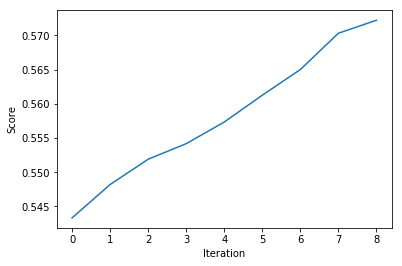

In [30]:
# plot the scores
plt.plot([i for i in range(len(scores_train3))], scores_train3)
plt.ylabel('Score')
plt.xlabel('Iteration')
plt.show()

The results with the sigmoid function are worse (~.57) than the default relu (~.66)

**(TO_DO - Q7 - Optional)** -- Compare the results with the logistic regression classifier available in sklearn.

In [ ]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
# ....

#### Signature

I, Felix Singerman, declare that the answers provided in this notebook are my own.